### Load Libraries

In [33]:
import pandas as pd
import re
import seaborn as sns

### Read and explore data

## Applications Data

In [78]:
applications_data = pd.read_csv('../data/BPI_Challenge_2017.csv')

In [79]:
applications_data.columns.values

array(['Action', 'org:resource', 'concept:name', 'EventOrigin', 'EventID',
       'lifecycle:transition', 'time:timestamp', 'case:LoanGoal',
       'case:ApplicationType', 'case:concept:name',
       'case:RequestedAmount', 'FirstWithdrawalAmount', 'NumberOfTerms',
       'Accepted', 'MonthlyCost', 'Selected', 'CreditScore',
       'OfferedAmount', 'OfferID'], dtype=object)

#### Fix column names 

In [100]:
fix_cols_names = lambda x: re.sub( '(?<!^)(?=[A-Z])', '_', x.replace('ID','Id')).lower().replace(':','_').replace('__','_')
fixed_app_cols = [fix_cols_names(col) for col in applications_data.columns]
fixed_app_cols

['action',
 'org_resource',
 'concept_name',
 'event_origin',
 'event_id',
 'lifecycle_transition',
 'time_timestamp',
 'case_loan_goal',
 'case_application_type',
 'case_concept_name',
 'case_requested_amount',
 'first_withdrawal_amount',
 'number_of_terms',
 'accepted',
 'monthly_cost',
 'selected',
 'credit_score',
 'offered_amount',
 'offer_id']

In [81]:
applications_data.columns = fixed_app_cols

In [82]:
applications_data.head()

,action,org_resource,concept_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_loan_goal,case_application_type,case_concept_name,case_requested_amount,first_withdrawal_amount,number_of_terms,accepted,monthly_cost,selected,credit_score,offered_amount,offer_id
0,Created,User_1,A_Create Application,Application,Application_652823628,complete,2016-01-01 09:51:15.304000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,statechange,User_1,A_Submitted,Application,ApplState_1582051990,complete,2016-01-01 09:51:15.352000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Created,User_1,W_Handle leads,Workflow,Workitem_1298499574,schedule,2016-01-01 09:51:15.774000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Deleted,User_1,W_Handle leads,Workflow,Workitem_1673366067,withdraw,2016-01-01 09:52:36.392000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Created,User_1,W_Complete application,Workflow,Workitem_1493664571,schedule,2016-01-01 09:52:36.403000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
applications_data.describe()

,case_requested_amount,first_withdrawal_amount,number_of_terms,monthly_cost,credit_score,offered_amount
count,1.202267e+06,42995.000000,42995.000000,42995.000000,42995.000000,42995.000000
mean,1.675947e+04,8394.338979,83.041982,281.403309,318.645912,18513.719940
std,1.572320e+04,10852.443358,36.386199,192.577735,433.706216,13718.507416
min,0.000000e+00,0.000000,5.000000,43.050000,0.000000,5000.000000
25%,6.000000e+03,0.000000,56.000000,152.820000,0.000000,8800.000000
50%,1.400000e+04,5000.000000,77.000000,244.520000,0.000000,15000.000000
75%,2.300000e+04,12000.000000,120.000000,350.000000,848.000000,25000.000000
max,4.500000e+05,75000.000000,180.000000,6673.830000,1145.000000,75000.000000


In [84]:
applications_data.describe(include='object')

,action,org_resource,concept_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_loan_goal,case_application_type,case_concept_name,accepted,selected,offer_id
count,1202267,1202267,1202267,1202267,1202267,1202267,1202267,1202267,1202267,1202267,42995,42995,150854
unique,5,149,26,3,1202267,7,1202209,14,2,31509,2,2,42995
top,statechange,User_1,W_Validate application,Workflow,OfferState_287867989,complete,2016-09-08 09:40:14.436000+00:00,Car,New credit,Application_1219772874,True,True,Offer_977536855
freq,358940,148404,209496,768823,1,475306,2,339798,1083767,180,30136,21768,4


#### Application EDA Questions

### - What is the distribution of Cases per Application Type?

In [85]:
cases_per_app_type = applications_data.case_application_type.value_counts() \
                        .to_frame() \
                        .reset_index() \
                        .rename(index=str, columns={
                            'index':'app_type',
                            'case_application_type':'count'})
cases_per_app_type

,app_type,count
0,New credit,1083767
1,Limit raise,118500


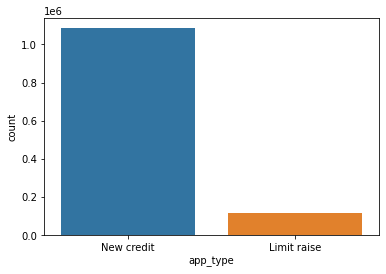

In [86]:
sns.barplot(x='app_type', y='count', data=cases_per_app_type);

### - What is the distribution of Cases per Loan Goal?

In [87]:
cases_per_loan_goal = applications_data.case_loan_goal.value_counts() \
                        .to_frame() \
                        .reset_index() \
                        .rename(index=str, columns={
                            'index':'loan_goal',
                            'case_loan_goal':'count'})

cases_per_loan_goal

,loan_goal,count
0,Car,339798
1,Home improvement,294389
2,Existing loan takeover,227606
3,"Other, see explanation",110643
4,Unknown,85085
5,Remaining debt home,43874
6,Not speficied,41048
7,Extra spending limit,22964
8,Caravan / Camper,12967
9,Motorcycle,9983


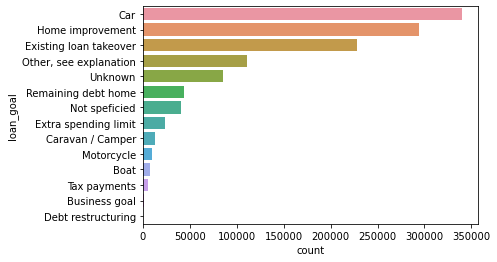

In [88]:
sns.barplot(x='count', y='loan_goal', data=cases_per_loan_goal);

### - What is the distribution of number of activities per case?

In [89]:
activities_per_case = applications_data.groupby('case_concept_name').action.count().reset_index(name='num_actions')
activities_per_case

,case_concept_name,num_actions
0,Application_1000086665,22
1,Application_1000158214,25
2,Application_1000311556,18
3,Application_1000334415,40
4,Application_1000339879,51
...,...,...
31504,Application_999507989,37
31505,Application_999544538,102
31506,Application_999632431,23
31507,Application_999993467,37


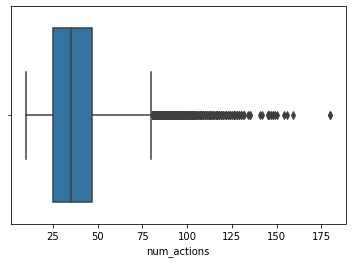

In [90]:
sns.boxplot(x=activities_per_case['num_actions']);

### - What is the distribution of value requested per application?

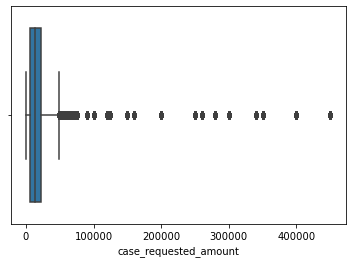

In [91]:
sns.boxplot(x=applications_data['case_requested_amount']);

In [92]:
applications_data['case_requested_amount'].describe().reset_index()

,index,case_requested_amount
0,count,1.202267e+06
1,mean,1.675947e+04
2,std,1.572320e+04
3,min,0.000000e+00
4,25%,6.000000e+03
5,50%,1.400000e+04
6,75%,2.300000e+04
7,max,4.500000e+05


## Offers Data

In [93]:
offers = pd.read_csv('../data/BPI_Challenge_offer_log_2017.csv')

In [94]:
offers.head()

,Action,org:resource,concept:name,EventOrigin,EventID,lifecycle:transition,time:timestamp,case:concept:name,case:MonthlyCost,case:Selected,case:ApplicationID,case:FirstWithdrawalAmount,case:CreditScore,case:OfferedAmount,case:NumberOfTerms,case:Accepted,OfferID
0,Created,User_17,O_Create Offer,Offer,Offer_247135719,complete,2016-01-02 09:17:05.720000+00:00,Offer_247135719,201.76,False,Application_196483749,10000.0,0,10000.0,57,True,NaN
1,statechange,User_17,O_Created,Offer,OfferState_124849367,complete,2016-01-02 09:17:08.762000+00:00,Offer_247135719,201.76,False,Application_196483749,10000.0,0,10000.0,57,True,Offer_247135719
2,statechange,User_17,O_Sent (online only),Offer,OfferState_440662877,complete,2016-01-02 09:19:21.330000+00:00,Offer_247135719,201.76,False,Application_196483749,10000.0,0,10000.0,57,True,Offer_247135719
3,statechange,User_17,O_Cancelled,Offer,OfferState_591416028,complete,2016-01-02 09:21:26.034000+00:00,Offer_247135719,201.76,False,Application_196483749,10000.0,0,10000.0,57,True,Offer_247135719
4,Created,User_17,O_Create Offer,Offer,Offer_941964966,complete,2016-01-02 09:21:42.022000+00:00,Offer_941964966,201.76,False,Application_196483749,4100.0,0,10000.0,57,True,NaN


#### Fix column names 

In [95]:
offers.columns

Index(['Action', 'org:resource', 'concept:name', 'EventOrigin', 'EventID',
       'lifecycle:transition', 'time:timestamp', 'case:concept:name',
       'case:MonthlyCost', 'case:Selected', 'case:ApplicationID',
       'case:FirstWithdrawalAmount', 'case:CreditScore', 'case:OfferedAmount',
       'case:NumberOfTerms', 'case:Accepted', 'OfferID'],
      dtype='object')

In [103]:
fixed_offers_cols = [fix_cols_names(col) for col in offers.columns]
fixed_offers_cols

['action',
 'org_resource',
 'concept_name',
 'event_origin',
 'event_id',
 'lifecycle_transition',
 'time_timestamp',
 'case_concept_name',
 'case_monthly_cost',
 'case_selected',
 'case_application_id',
 'case_first_withdrawal_amount',
 'case_credit_score',
 'case_offered_amount',
 'case_number_of_terms',
 'case_accepted',
 'offer_id']

In [104]:
offers.columns = fixed_offers_cols

In [107]:
offers.head()

,action,org_resource,concept_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_concept_name,case_monthly_cost,case_selected,case_application_id,case_first_withdrawal_amount,case_credit_score,case_offered_amount,case_number_of_terms,case_accepted,offer_id
0,Created,User_17,O_Create Offer,Offer,Offer_247135719,complete,2016-01-02 09:17:05.720000+00:00,Offer_247135719,201.76,False,Application_196483749,10000.0,0,10000.0,57,True,NaN
1,statechange,User_17,O_Created,Offer,OfferState_124849367,complete,2016-01-02 09:17:08.762000+00:00,Offer_247135719,201.76,False,Application_196483749,10000.0,0,10000.0,57,True,Offer_247135719
2,statechange,User_17,O_Sent (online only),Offer,OfferState_440662877,complete,2016-01-02 09:19:21.330000+00:00,Offer_247135719,201.76,False,Application_196483749,10000.0,0,10000.0,57,True,Offer_247135719
3,statechange,User_17,O_Cancelled,Offer,OfferState_591416028,complete,2016-01-02 09:21:26.034000+00:00,Offer_247135719,201.76,False,Application_196483749,10000.0,0,10000.0,57,True,Offer_247135719
4,Created,User_17,O_Create Offer,Offer,Offer_941964966,complete,2016-01-02 09:21:42.022000+00:00,Offer_941964966,201.76,False,Application_196483749,4100.0,0,10000.0,57,True,NaN


In [105]:
offers.describe()

,case_monthly_cost,case_first_withdrawal_amount,case_credit_score,case_offered_amount,case_number_of_terms
count,193849.000000,193849.000000,193849.000000,193849.000000,193849.000000
mean,281.028689,8383.631394,353.372496,18574.845074,83.356014
std,190.251145,10782.271378,443.086227,13718.516739,36.363493
min,43.050000,0.000000,0.000000,5000.000000,5.000000
25%,152.820000,0.000000,0.000000,9000.000000,56.000000
50%,244.530000,5000.000000,0.000000,15000.000000,78.000000
75%,350.000000,12000.000000,869.000000,25000.000000,120.000000
max,6673.830000,75000.000000,1145.000000,75000.000000,180.000000


In [106]:
offers.describe(include='object')

,action,org_resource,concept_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_concept_name,case_application_id,offer_id
count,193849,193849,193849,193849,193849,193849,193849,193849,193849,150854
unique,2,144,8,1,193849,1,193847,42995,31509,42995
top,statechange,User_1,O_Create Offer,Offer,OfferState_1442082852,complete,2016-01-29 08:10:58.778000+00:00,Offer_141588820,Application_423354116,Offer_141588820
freq,150854,9982,42995,193849,1,193849,2,5,40,4


## EDA Questions on Offers

### - How many offers per application?

## EDA Questions on Offers x Applications

### - How long between filling and application and getting an offer?

### - What is the difference between the requested and the offered value?

### - What is the relation between percentage of requested value offered and acceptance by the customer?